In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the input data file

df = pd.read_csv("task6_1_dataset.csv")
df.head()

,Unnamed: 0,x1,x2,y
0,0,-1.682231,7.810350,0.0
1,1,-7.200878,9.754777,0.0
2,2,-6.473791,10.441019,0.0
3,3,-5.981745,8.025655,0.0
4,4,-4.521350,9.109850,0.0


In [3]:
# Drop the first column as it is just the index

df=df.drop('Unnamed: 0', axis = 1) 
df.head()

,x1,x2,y
0,-1.682231,7.810350,0.0
1,-7.200878,9.754777,0.0
2,-6.473791,10.441019,0.0
3,-5.981745,8.025655,0.0
4,-4.521350,9.109850,0.0


In [4]:
# Check total number of records in dataset
df.shape

(150, 3)

In [5]:
# Check Data Distribution
df.describe()

,x1,x2,y
count,150.000000,150.000000,150.000000
mean,-2.796618,4.526180,1.000000
std,3.401406,3.603997,0.819232
min,-8.941255,-1.813739,0.000000
25%,-5.145164,1.415661,0.000000
50%,-3.443527,3.891580,1.000000
75%,-0.035521,7.930824,2.000000
max,5.704161,12.136805,2.000000


In [6]:
# Check Datatype and Null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   y       150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


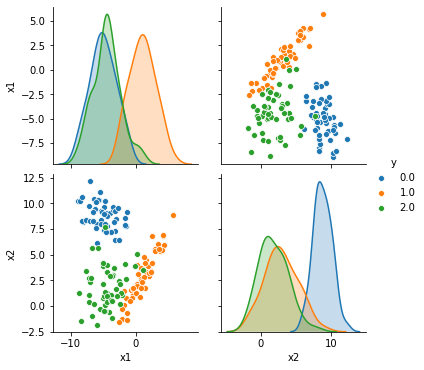

In [7]:
# Visualize the distribution wrt output class 'y'

sns.pairplot(df,hue='y')

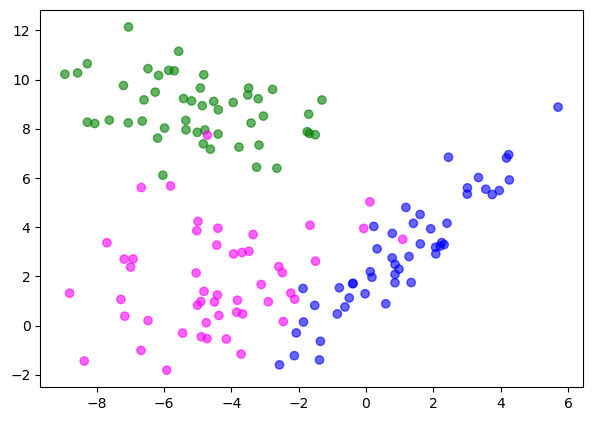

In [8]:
# Visulaize the data in scatter plot

colors = {0:'green', 1:'blue', 2:'magenta'}
plt.subplots(figsize=(7, 5), dpi=100)
plt.scatter(df['x1'],df['x2'], alpha=0.6, c=df['y'].map(colors))

In [9]:
# Load KNN libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [10]:
y_train=df['y']
X_train=df.drop('y', axis = 1) 
X_train.head()

,x1,x2
0,-1.682231,7.810350
1,-7.200878,9.754777
2,-6.473791,10.441019
3,-5.981745,8.025655
4,-4.521350,9.109850


In [11]:
# Apply KNN with n=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
X_test=pd.DataFrame([[-4,8]],columns=['x1','x2'])
X_test

,x1,x2
0,-4,8


In [13]:
pred = knn.predict(X_test)
pred

array([0.])

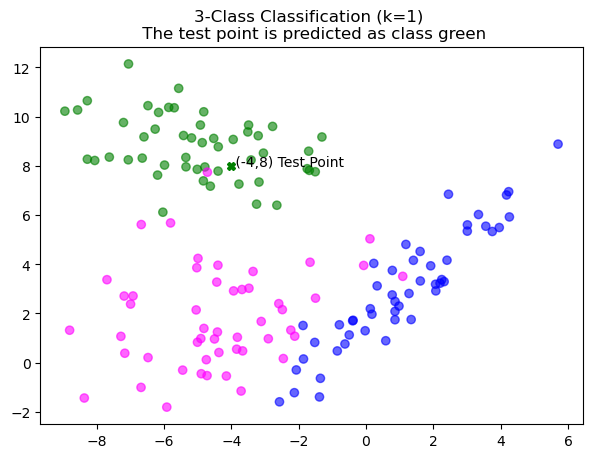

In [14]:
# visulaize the point [-4,8] in scatter plot

colors = {0:'green', 1:'blue', 2:'magenta'}
plt.subplots(figsize=(7, 5), dpi=100)
plt.scatter(df['x1'],df['x2'], alpha=0.6, c=df['y'].map(colors))
plt.title("3-Class Classification (k=1) \n The test point is predicted as class green")
plt.text(-4,8," (-4,8) Test Point")
plt.plot(-4,8,'gX')

In [15]:
# Apply KNN with n=15

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

X_test=pd.DataFrame([[-2,5]],columns=['x1','x2'])
pred = knn.predict(X_test)
pred

array([2.])

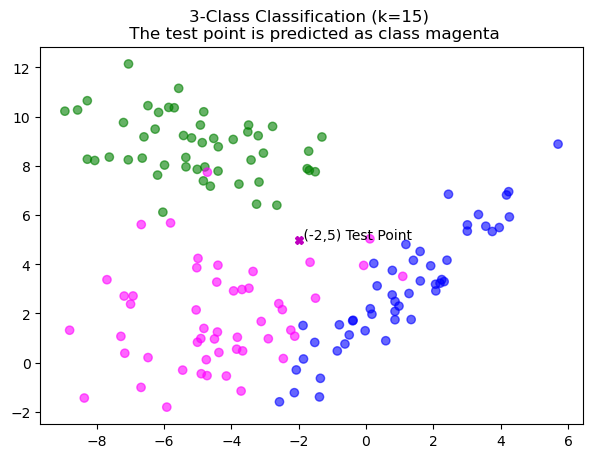

In [16]:
# visulaize the point [-2,5] in scatter plot

colors = {0:'green', 1:'blue', 2:'magenta'}
plt.subplots(figsize=(7, 5), dpi=100)
plt.scatter(df['x1'],df['x2'], alpha=0.6, c=df['y'].map(colors))
plt.title("3-Class Classification (k=15) \n The test point is predicted as class magenta")
plt.text(-2,5," (-2,5) Test Point")
plt.plot(-2,5,'mX')

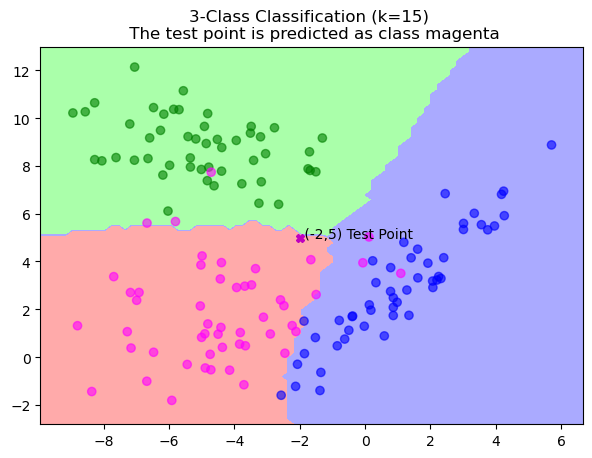

In [17]:
# Visulaize the point with decision boundries

Y=np.array(df['y'])
X=np.array(df.drop('y',axis=1))
h=0.2

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max]
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF', '#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.subplots(figsize=(7, 5), dpi=100)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
colors = {0:'green', 1:'blue', 2:'magenta'}
plt.scatter(df['x1'],df['x2'], alpha=0.6, c=df['y'].map(colors))
plt.title("3-Class Classification (k=15) \n The test point is predicted as class magenta")
plt.text(-2,5," (-2,5) Test Point")
plt.plot(-2,5,'mX')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()